# CA5 - 810100251 - Reza abdoli
## Goal
In this notebook, we learn about CNN models and how to use them to determine if a tweet is related to suicide or not.

## Part 0 - preparing data

In [1]:
# nltk.download('stopwords')
# nltk.download('punkt')

# nltk.download('wordnet') this has been used

in this section (function) i am going to preprocess text. such as deleting numbers and punctuations, replacing emoji with space and so on ...

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
 
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\d+', '', text) 
    
    text = re.sub(r'http\S+|www\S+', '', text) # www.t.com
    
    text = re.sub(r'@\w+', '', text) # @reza
    
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    text = re.sub(r'\s+', ' ', text).strip() # Ali   Reza -> Ali Reza
    
 
    text = ' '.join(re.findall(r'\b\w+\b', text)) # keeping words
    
    tokens = word_tokenize(text)
    
    # ps = PorterStemmer()
    # ps = SnowballStemmer('english')
    # stemmed_tokens = [ps.stem(token) for token in tokens] these libraries & functions are not work properly so I used the library below
    
    ps = WordNetLemmatizer()
    stemmed_tokens = [ps.lemmatize(token) for token in tokens]
    
    # stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]
    
    return filtered_tokens


in this section i am going to compare some main texts(tweets) to the tokens which have been filtered.

In [3]:
import pandas as pd
data = pd.read_csv("twitter-suicidal-data.csv")
sample_tweets = data['tweet'].head(5)
for tweet in sample_tweets:
    preprocessed_tweet = preprocess_text(tweet)
    print("before preprocessing\n", tweet)
    print("\nafter preprocessing\n", preprocessed_tweet)
    print("----------------------------------------------")

before preprocessing
 my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives

after preprocessing
 ['life', 'meaningless', 'want', 'end', 'life', 'badly', 'life', 'completely', 'empty', 'dont', 'want', 'create', 'meaning', 'creating', 'meaning', 'pain', 'long', 'hold', 'back', 'urge', 'run', 'car', 'head', 'first', 'next', 'person', 'coming', 'opposite', 'way', 'stop', 'feeling', 'jealous', 'tragic', 'character', 'like', 'gomer', 'pile', 'swift', 'end', 'able', 'bring', 'life']
----------------------------------------------
before preprocessing
 muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in thi

as we can see, most of the words has been rooted correctly, numbers, emojis,punctuations, ... have been removed successfully

in the following section i am going to read, store the tweets (+ their intentions) and eventually preprocess them 

In [4]:
processed_data = []
for index, row in data.iterrows():
    tweet = row['tweet']
    intention = row['intention']
    processed_tweet = preprocess_text(tweet)
    processed_data.append({'tweet_tokens': processed_tweet, 'intention': intention})

# چاپ توکن‌ها و برچسب‌ها برای چند نمونه
for i in range(5):
    print("tokens:", processed_data[i]['tweet_tokens'])
    print("Intention:", processed_data[i]['intention'])
    print("----------------------------------------------")

tokens: ['life', 'meaningless', 'want', 'end', 'life', 'badly', 'life', 'completely', 'empty', 'dont', 'want', 'create', 'meaning', 'creating', 'meaning', 'pain', 'long', 'hold', 'back', 'urge', 'run', 'car', 'head', 'first', 'next', 'person', 'coming', 'opposite', 'way', 'stop', 'feeling', 'jealous', 'tragic', 'character', 'like', 'gomer', 'pile', 'swift', 'end', 'able', 'bring', 'life']
Intention: 1
----------------------------------------------
tokens: ['muttering', 'wan', 'na', 'die', 'daily', 'month', 'feel', 'worthless', 'shes', 'soulmate', 'cant', 'live', 'horrible', 'world', 'without', 'lonely', 'wish', 'could', 'turn', 'part', 'brain', 'feel']
Intention: 1
----------------------------------------------
tokens: ['work', 'slave', 'really', 'feel', 'like', 'purpose', 'life', 'make', 'higher', 'man', 'money', 'parent', 'forcing', 'college', 'much', 'plate', 'owe', 'lot', 'money', 'know', 'easy', 'way', 'really', 'tired', 'issue', 'top', 'dealing', 'tension', 'america', 'well', 'wa

In [5]:
# texts = data['tweet']
# tweets = []
# for tweet in texts:
#     preprocessed_tweet = preprocess_text(tweet)
#     tweets.append(preprocessed_tweet)
# for i in range(0,3):
#     print(tweets[i])
#     print()

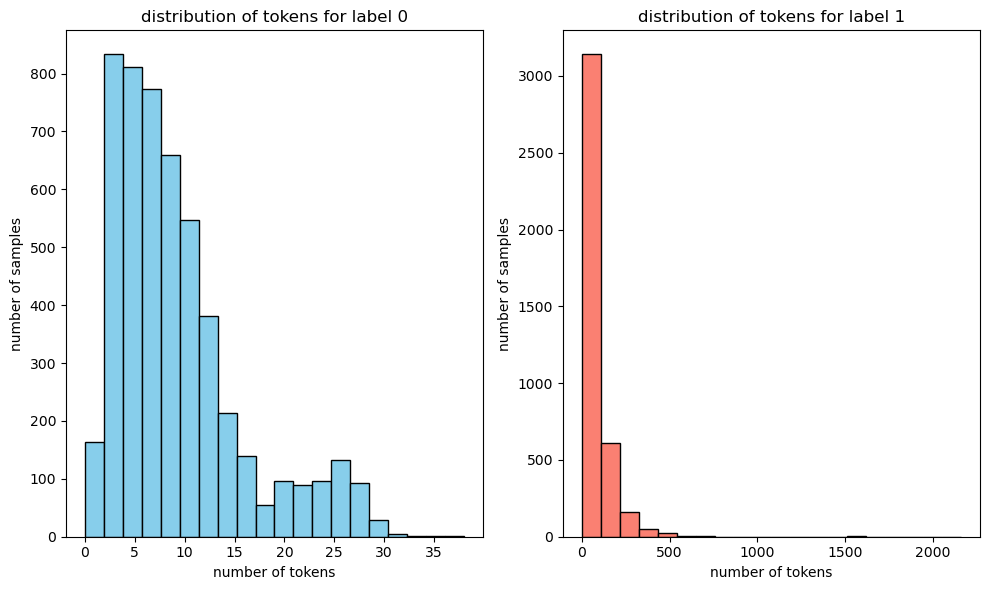

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

token_counts_0 = [len(item['tweet_tokens']) for item in processed_data if item['intention'] == 0]
token_counts_1 = [len(item['tweet_tokens']) for item in processed_data if item['intention'] == 1]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(token_counts_0, bins=20, color='skyblue', edgecolor='black')
plt.title('distribution of tokens for label 0')
plt.xlabel('number of tokens')
plt.ylabel('number of samples')


plt.subplot(1, 2, 2)
plt.hist(token_counts_1, bins=20, color='salmon', edgecolor='black')
plt.title('distribution of tokens for label 1')
plt.xlabel('number of tokens')
plt.ylabel('number of samples')

plt.tight_layout()
plt.show()


in the charts above i have shown the distribution of each label, with number of samples

In [7]:
token_counts_0 = np.array(token_counts_0)
min_value = np.min(token_counts_0)
max_value = np.max(token_counts_0)
mean_value = np.mean(token_counts_0)

print("Tokens with the label 0")
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")
print("---------------------")
token_counts_1 = np.array(token_counts_1)
min_value = np.min(token_counts_1)
max_value = np.max(token_counts_1)
mean_value = np.mean(token_counts_1)

print("Tokens with the label 1")
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")

Tokens with the label 0
Min: 0
Max: 38
Mean: 9.079281390353447
---------------------
Tokens with the label 1
Min: 0
Max: 2159
Mean: 75.04902451225612


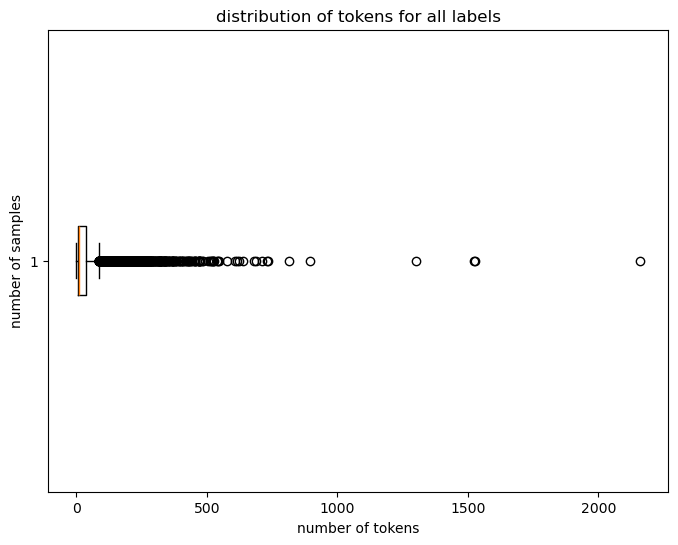

In [9]:
all_token_counts = [len(item['tweet_tokens']) for item in processed_data]
plt.figure(figsize=(8, 6))
plt.boxplot(all_token_counts, vert=False)
plt.title('distribution of tokens for all labels')
plt.xlabel('number of tokens')
plt.ylabel('number of samples')
plt.show()


In [11]:
all_token_counts = np.array(all_token_counts)
min_value = np.min(all_token_counts)
max_value = np.max(all_token_counts)
mean_value = np.mean(all_token_counts)

print("All Tokens")
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")

All Tokens
Min: 0
Max: 2159
Mean: 38.00208356179406


## Q1
**Advantages and Disadvantages of Converting Text to Lowercase**

**Advantages:**
- **Reducing Comparison Errors:** In searches and comparisons, uppercase and lowercase letters might be considered different values. By converting to lowercase, this issue is resolved.
- **Improving Model Efficiency:** Converting all letters to lowercase can improve model efficiency by preventing the creation of unnecessary features.
- **Reducing Complexity:** This reduces the number of different forms of a word. For example, "Apple" and "apple" both become "apple," which reduces the number of tokens and increases the accuracy of machine learning models.

**Disadvantages:**
- **Loss of Semantic Information:** In some cases, uppercase letters can have specific meanings. For example, "Apple" (the company) and "apple" (the fruit) may have different meanings. Converting to lowercase may eliminate these distinctions.

## Q2
**Removing Numbers in Text Preprocessing**

**Advantages:**
- **Reducing Noise in Data:** Many numbers in texts do not provide useful information for models and can act as noise. Removing numbers reduces this noise and improves model accuracy.
- **Reducing Complexity:** Eliminating numbers can reduce data complexity. This helps enhance the performance of natural language processing models by reducing the number of unnecessary tokens.
- **Simplifying Text:** In some applications, such as sentiment analysis or topic detection, numbers do not play a significant role, and removing them can make the text cleaner and simpler.

**Disadvantages:**
- **Loss of Semantic Information:** In some texts, numbers can carry important semantic information. For example, in financial reports, dates, statistics, and even scientific texts, numbers can be crucial. Removing numbers may lead to the loss of this information.
- **Impact on Model Accuracy:** In some cases, numbers can be useful for distinguishing between different categories of texts. Removing them may reduce the model's accuracy in these instances.

In [1]:
import numpy as np
from gensim.models import KeyedVectors

word2vec_model = Word2Vec.load('word2vec-google-news-300')


input_dim = 64  


input_matrix = np.zeros((len(processed_data), input_dim, 300))  

for i, entry in enumerate(processed_data):
    tweet_tokens = entry['tweet_tokens']
    for j, token in enumerate(tweet_tokens):
        if token in word2vec_model:
            input_matrix[i, j, :] = word2vec_model[token]
        else:
            input_matrix[i, j, :] = np.zeros(300)  



ModuleNotFoundError: No module named 'gensim'